This code takes in input fies from the simulation and makes snapshots into images. Then can pass to ffmpeg to make video.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import h5py
import os
#path = 'C:/Users/"Noah Notis"/Dropbox/USRP2020_Noah/src/output/fInfL20T4n40r64/snap0000.h5'

Testing visualize code:

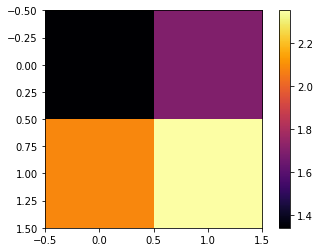

In [10]:
# visualizer that doesn't save file:
def visualize_test(psi_real, psi_im, axis_num):
    psi_real2 = np.sum(psi_real**2, axis = axis_num)
    psi_im2 = np.sum(psi_im**2, axis = axis_num)
    psi2 = np.log10(psi_real2 + psi_im2) # using logarithmic scale to see color differences
    '''
    psi2_len = psi2.shape[0]
    max_ind = np.where(psi2 == np.amax(psi2))
    x_max = max_ind[0][0]
    y_max = max_ind[1][0]
    #z_max = max_ind[2][0]
    signed_x_dist_to_cent = int(psi2_len / 2) - x_max
    signed_y_dist_to_cent = int(psi2_len / 2) - y_max
    #signed_z_dist_to_cent = int(rho_len / 2) - z_max
    #print(signed_x_dist_to_cent)
    #print(signed_y_dist_to_cent)
    #print(signed_z_dist_to_cent)
    psi2_n = np.roll(psi2, signed_x_dist_to_cent, axis=0)
    psi2_n2 = np.roll(psi2_n, signed_y_dist_to_cent, axis=1)
    #rho_n3 = np.roll(rho_n2, signed_z_dist_to_cent, axis=2)
    psi2 = psi2_n2'''

    plt.set_cmap('inferno')
    plt.imshow(psi2)
    plt.colorbar()
    plt.show()

# testing function
p
visualize_test(a, b, 2)

Function to visualize the two 3d arrays:

In [11]:
#takes in two 3D arrays and produces picture of the result
#saves picture in file in subdirectory
#params: two 3d arrays, the axis to sum across, 
#the figure name, and the subdirectory name.
#axis_num can be {0, 1, 2}

def visualize(psi_real, psi_im, axis_num, fig_name, dir_name):
    psi_real2 = np.sum(psi_real**2, axis = axis_num)
    psi_im2 = np.sum(psi_im**2, axis = axis_num)
    psi2 = np.log(psi_real2 + psi_im2)
    plt.set_cmap('inferno')
    plt.imshow(psi2)
    plt.clim(0,25)
    plt.colorbar()
    plt.savefig(dir_name + "/" + fig_name)
    plt.clf()

Testing the hdf5 reading code:

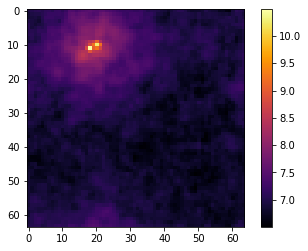

In [12]:
#testing hdf5 reading code:
#using path starting with /mnt because of linux subsystem

path = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/output/f1L20T4n400r64'
hf = h5py.File(path + '/snap0300.h5', 'r')
psi_real = np.array(hf['psiRe'])        
psi_im = np.array(hf['psiIm'])
visualize_test(psi_real, psi_im, 0)

Function to open the files from the simulation and create image files in a subfolder:

In [5]:
#params: path to folder with hdf5 files, desired subfolder name, the simulation size, e.g. 40 (not counting initial pic)

def make_pics(path_to_folder, dir_name, n_sim): 
    dir = path_to_folder + '/' + dir_name
    if not os.path.exists(dir):
        os.mkdir(dir)
    for i in range(n_sim + 1):
        hf = h5py.File(path_to_folder + "/snap" + str(i).zfill(4) +".h5", 'r')
        psi_real = np.array(hf['psiRe'])
        psi_im = np.array(hf['psiIm'])
        visualize(psi_real, psi_im, 2, 'pic' + str(i).zfill(4), dir)

Testing out the make_pics function:

In [ ]:
path = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/f2L20T4n400r128'
make_pics(path, 'tpics', 400)